# Regresja drzewa decyzyjnego

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

In [2]:
dane = pd.read_csv('04_mieszkania.csv')
X = dane.iloc[:, :1].values # kolumna pierwasza 
y = dane.iloc[:, -1].values # ostatnia kolumna

In [3]:
# model = DecisionTreeRegressor(random_state=0)
model = DecisionTreeRegressor(    
    criterion='squared_error', # Funkcja mierząca jakość podziału.
    # 'squared_error': minimalizuje sumę kwadratów błędów.
    # 'friedman_mse': zmodyfikowana wersja 
    # 'squared_error' poprawiająca wydajność w gradient boosting.
    # 'absolute_error': minimalizuje sumę bezwzględnych wartości błędów.
    splitter='best', # Strategia stosowana do wyboru podziału w węźle.
    # 'best': wybiera najlepszy możliwy podział.
    # 'random': wybiera losowy podział spośród najlepszych podziałów.
    max_depth=None, # Maksymalna głębokość drzewa.
    # Jeśli None, węzły są rozszerzane aż do minimalnej liczby próbek na węzeł. (int)
    min_samples_split=2, # Minimalna liczba próbek wymagana do podziału węzła.
    min_samples_leaf=1, # Minimalna liczba próbek wymagana do pozostawienia w liściu.
    min_weight_fraction_leaf=0.0, # Minimalna waga frakcji sumy całkowitej wagi (wszystkich próbek) w liściu.
    max_features=None, # Liczba cech do rozważenia przy dzieleniu węzłów.
    random_state=None, # Losowy stan kontrolujący losowość podziałów.
    max_leaf_nodes=None, # Maksymalna liczba liści w drzewie.
    min_impurity_decrease=0.0, # Minimalna wymagana redukcja nieczystości.
    ccp_alpha=0.0, # Złożoność parametru przycinania (Cost Complexity Pruning).
    monotonic_cst=None # Monotoniczne ograniczenia na cechy.
    )

model.fit(X, y)

DecisionTreeRegressor()

In [4]:
# Wizualizacja polega na stworzeniu tablicy X-ów na tyle gęstych żeby było widać dokładny przebieg krzywej modelu, (ilość punktów X = max(X)-min(X))
X_in = np.linspace(np.min(X), np.max(X), (np.max(X)-np.min(X))) # wygenerowanie X wejściowych w zakresie danych wejściowych między min(X) - max(X)
X_in = X_in.reshape(-1, 1) # konwersja do tablicy dwuwymiarowej
prognoza = model.predict(X_in) 

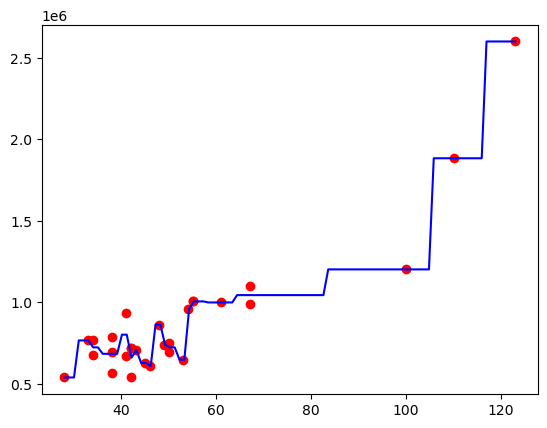

In [5]:
plt.scatter(X, y, color='red') 
plt.plot(X_in, prognoza, color='blue') 
plt.show()

In [6]:
# prognozy dla jednej danej wejściowej
X_in = [[95]] # można naraz wyłuskać więcej danych np.[[21],[76],[34]]
prognoza = model.predict(X_in)
print(X_in, prognoza)

[[95]] [1202650.]
